In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Check Dataset

In [ ]:
import os

# Define the path to the dataset directory
dataset_path = "./masked_images_face"

# Initialize counters for files in train and test directories
train_file_count = 0
test_file_count = 0

# Function to count files in a directory recursively
def count_files_in_dir(directory):
    file_count = 0
    for root, _, files in os.walk(directory):
        file_count += len(files)
    return file_count

# Paths for train and test directories
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")

# Count files in train and test directories
if os.path.exists(train_path):
    train_file_count_dir = count_files_in_dir(train_path)
if os.path.exists(test_path):
    test_file_count_dir = count_files_in_dir(test_path)

train_file_count_dir, test_file_count_dir

def count_files_by_class(directory):
    class_file_counts = {}
    if os.path.exists(directory):
        for class_name in os.listdir(directory):
            class_path = os.path.join(directory, class_name)
            if os.path.isdir(class_path):  # Ensure it's a directory
                class_file_counts[class_name] = count_files_in_dir(class_path)
    return class_file_counts

# Count files for each class in train and test directories
train_class_counts = count_files_by_class(train_path)
test_class_counts = count_files_by_class(test_path)

train_class_counts, test_class_counts

({'autumn': 875, 'spring': 875, 'summer': 875, 'winter': 875},
 {'autumn': 175, 'spring': 175, 'summer': 175, 'winter': 175})

In [ ]:
%pip install split-folders
!pip install opendatasets
!pip install pandas
%pip install scikit-learn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install plotly
%pip install matplotlib
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
import tensorflow as tf
import splitfolders
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import itertools
import plotly.express as px
#Suppressing Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
data_dir = "./masked_images_face"
data_dir = pathlib.Path(data_dir)

In [ ]:
Total_Images = glob.glob('./masked_images_face/*/*/*/*.png')
print("Total Number of Images", len(Total_Images))
Total_Images = pd.Series(Total_Images)

Total Number of Images 4200


In [ ]:
Total_Images

0       ./masked_images_face\test\autumn\deep autumn\d...
1       ./masked_images_face\test\autumn\deep autumn\d...
2       ./masked_images_face\test\autumn\deep autumn\d...
3       ./masked_images_face\test\autumn\deep autumn\d...
4       ./masked_images_face\test\autumn\deep autumn\d...
                              ...                        
4195    ./masked_images_face\train\winter\deep winter\...
4196    ./masked_images_face\train\winter\deep winter\...
4197    ./masked_images_face\train\winter\deep winter\...
4198    ./masked_images_face\train\winter\deep winter\...
4199    ./masked_images_face\train\winter\deep winter\...
Length: 4200, dtype: object

In [ ]:
Total_Df = pd.DataFrame()

Total_Df['FileName'] = Total_Images.map(lambda ImageName :ImageName.split("H")[-1])
Total_Df['Subclass'] = Total_Images.map(lambda ImageName :ImageName.split("\\")[-2])
Total_Df['ClassId'] = Total_Images.map(lambda ImageName :ImageName.split("\\")[-3])

Total_Df.head()

FileName     Subclass ClassId
0  ./masked_images_face\test\autumn\deep autumn\d...  deep autumn  autumn
1  ./masked_images_face\test\autumn\deep autumn\d...  deep autumn  autumn
2  ./masked_images_face\test\autumn\deep autumn\d...  deep autumn  autumn
3  ./masked_images_face\test\autumn\deep autumn\d...  deep autumn  autumn
4  ./masked_images_face\test\autumn\deep autumn\d...  deep autumn  autumn

In [ ]:
Class_Id_Dist_Total = Total_Df['ClassId'].value_counts()
Class_Id_Dist_Total.head(12)

ClassId
autumn    1050
spring    1050
summer    1050
winter    1050
Name: count, dtype: int64

In [ ]:
Subclass_Dist_Total = Total_Df['Subclass'].value_counts()
Subclass_Dist_Total.head(12)

Subclass
deep autumn     446
deep winter     422
soft summer     402
warm spring     367
light spring    360
cool winter     354
light summer    334
soft autumn     323
clear spring    323
cool summer     314
warm autumn     281
clear winter    274
Name: count, dtype: int64

In [ ]:
fig = go.Figure(go.Bar(
            x= Class_Id_Dist_Total.values,
            y=Class_Id_Dist_Total.index,
            orientation='h'))

fig.update_layout(title='Data Distribution in Bars',font_size=15,title_x=0.45)


fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x= Subclass_Dist_Total.values,
            y=Subclass_Dist_Total.index,
            orientation='h'))

fig.update_layout(title='Data Distribution in Bars',font_size=15,title_x=0.45)


fig.show()

In [ ]:
# fig=px.pie(Class_Id_Dist_Total.head(10),values= 'ClassId', names=Total_Df['ClassId'].unique(),hole=0.425)
# Use .values to access the values (counts) and .index to access the labels (class IDs)
fig=px.pie(Class_Id_Dist_Total.head(10),values=Class_Id_Dist_Total.head(10).values, names=Class_Id_Dist_Total.head(10).index,hole=0.425)
fig.update_layout(title='Data Distribution of Data',font_size=15,title_x=0.45,annotations=[dict(text='Armochromia',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [ ]:
fig=px.pie(Subclass_Dist_Total.head(12),values=Subclass_Dist_Total.head(12).values, names=Subclass_Dist_Total.head(12).index,hole=0.425)
fig.update_layout(title='Data Distribution of Data',font_size=15,title_x=0.45,annotations=[dict(text='Armochromia',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [ ]:
train_path='./masked_images_face/train'
# val_path='./output/val'
test_path='./masked_images_face/test'
class_names=os.listdir(train_path)
# class_names_val=os.listdir(val_path)
class_names_test=os.listdir(test_path)

In [ ]:
train_image1 = glob.glob('./masked_images_face//train/*/*/*.png')

Total_TrainImages = train_image1
print("Total number of training images: ", len(Total_TrainImages))


test_image1 = glob.glob('./masked_images_face/test/*/*/*.png')

Total_TestImages = test_image1
print("Total number of test images: ", len(Total_TestImages))



# Val_image1 = glob.glob('./output/val/*/*.jpeg')

# Total_ValImages = Val_image1
# print("Total number of val images: ", len(Total_ValImages))

Total number of training images:  3500
Total number of test images:  700


In [ ]:
train_image_names = pd.Series(Total_TrainImages)
train_df = pd.DataFrame()

# generate Filename field
train_df['Filename'] = train_image_names.map( lambda img_name: img_name.split("\\")[-1])

train_df['Subclass'] = train_image_names.map( lambda img_name: img_name.split("\\")[-2])

# generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name: img_name.split("\\")[-3])

train_df.head()

Filename     Subclass ClassId
0    deep_autumn_1.png  deep autumn  autumn
1   deep_autumn_10.png  deep autumn  autumn
2  deep_autumn_100.png  deep autumn  autumn
3  deep_autumn_102.png  deep autumn  autumn
4  deep_autumn_103.png  deep autumn  autumn

In [ ]:
test_image_names = pd.Series(Total_TestImages)
test_df = pd.DataFrame()

# generate Filename field
test_df['Filename'] = test_image_names.map( lambda img_name: img_name.split("\\")[-1])

test_df['Subclass'] = test_image_names.map( lambda img_name: img_name.split("\\")[-2])

# generate ClassId field
test_df['ClassId'] = test_image_names.map(lambda img_name: img_name.split("\\")[-3])

test_df.head()

Filename     Subclass ClassId
0   deep_autumn_10.png  deep autumn  autumn
1  deep_autumn_100.png  deep autumn  autumn
2  deep_autumn_101.png  deep autumn  autumn
3  deep_autumn_104.png  deep autumn  autumn
4  deep_autumn_107.png  deep autumn  autumn

In [ ]:
class_id_distribution_Train = train_df['Subclass'].value_counts()
class_id_distribution_Train.head(12)

Subclass
deep autumn     374
deep winter     346
soft summer     341
warm spring     303
light spring    302
cool winter     296
soft autumn     275
clear spring    270
light summer    269
cool summer     265
clear winter    233
warm autumn     226
Name: count, dtype: int64

In [ ]:
class_id_distribution_Test = test_df['Subclass'].value_counts()
class_id_distribution_Test.head(12)

Subclass
deep winter     76
deep autumn     72
light summer    65
warm spring     64
soft summer     61
light spring    58
cool winter     58
warm autumn     55
clear spring    53
cool summer     49
soft autumn     48
clear winter    41
Name: count, dtype: int64

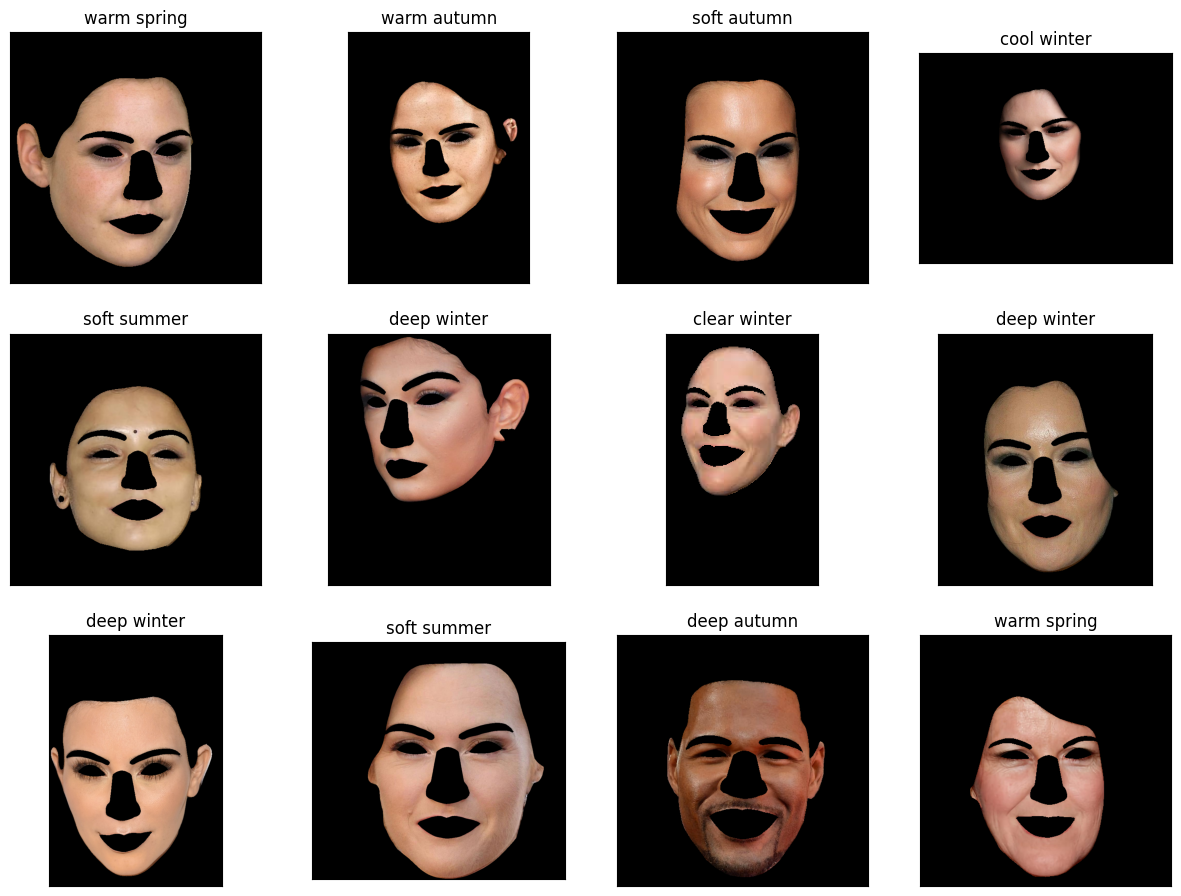

In [ ]:
plot_df = train_df.sample(12).reset_index()
plt.figure(figsize=(15, 15))

for i in range(12):
    img_name = plot_df.loc[i, 'Filename']
    subclass = (plot_df.loc[i, 'Subclass'])
    label_str = ((plot_df.loc[i, 'ClassId']))
    plt.subplot(4,4,i+1)
    plt.imshow(plt.imread(os.path.join(train_path, label_str, subclass, img_name)))
    plt.title(subclass)
    plt.xticks([])
    plt.yticks([])

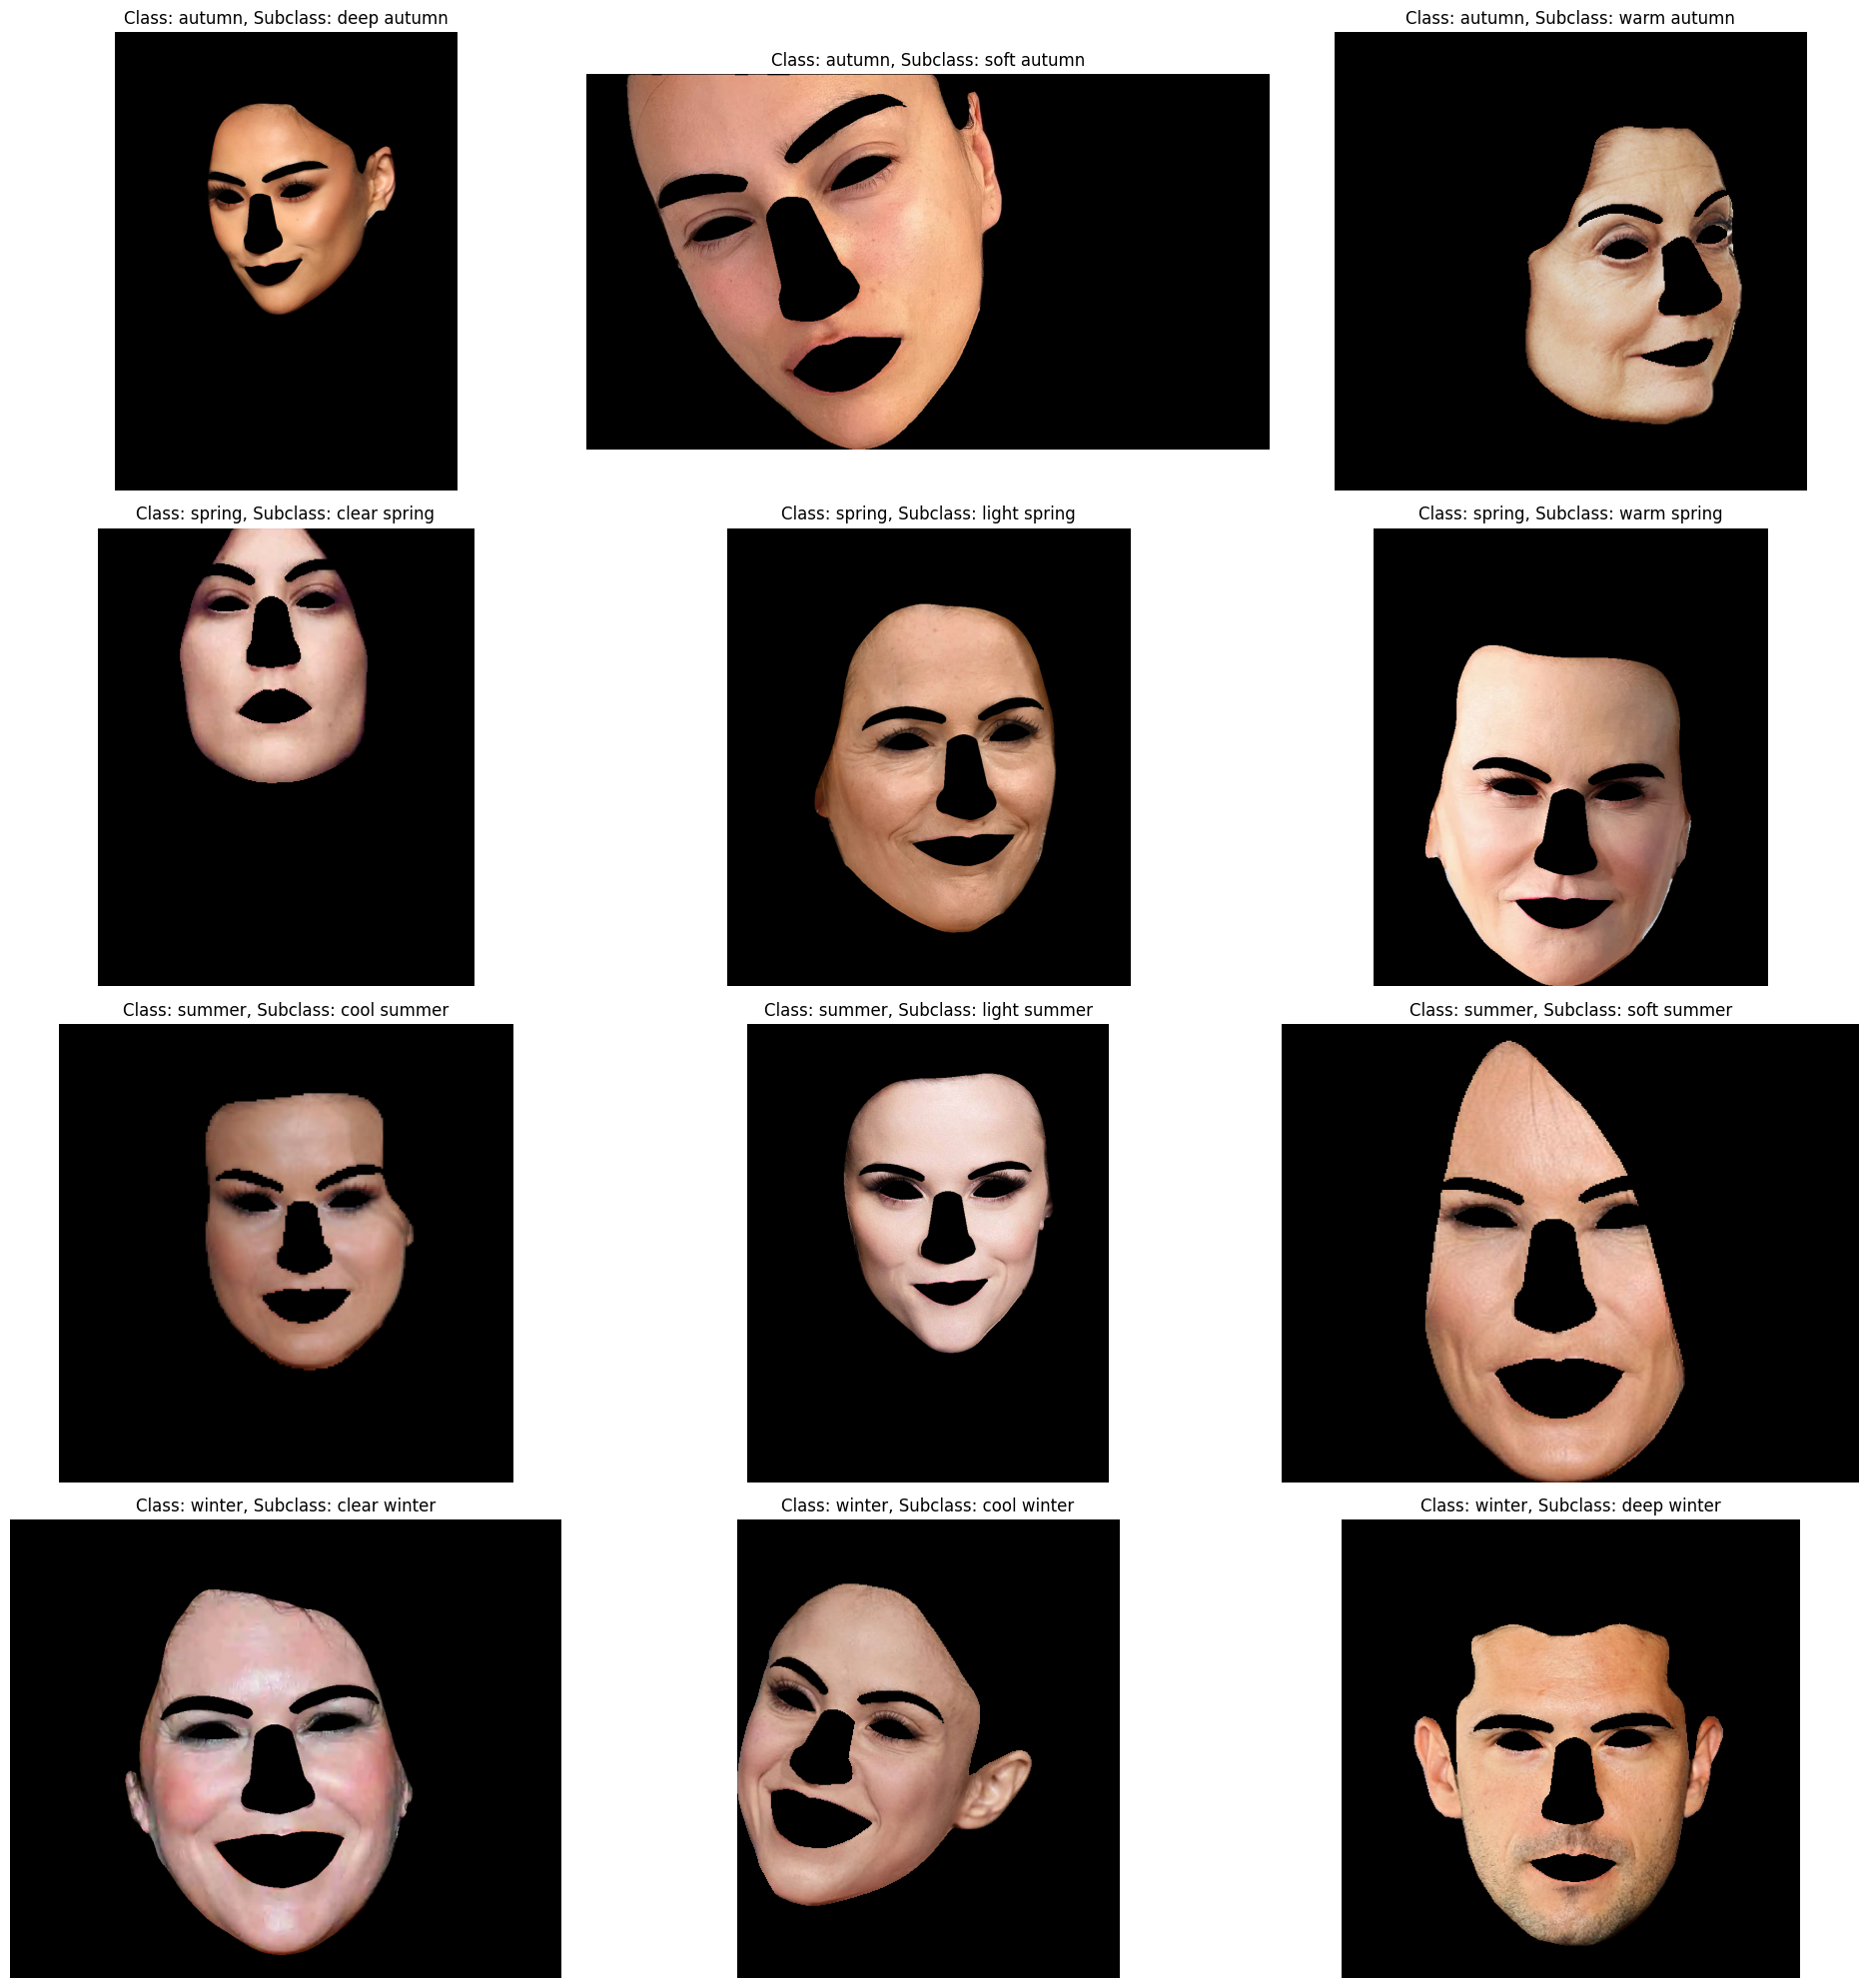

In [ ]:
import matplotlib.pyplot as plt
import os

# Assuming `train_df` is your DataFrame and `train_path` is defined

# Get unique class IDs and subclass IDs
unique_class_ids = train_df['ClassId'].unique()
unique_subclass_ids = train_df['Subclass'].unique()

# Create a figure and axes for the plots
fig, axes = plt.subplots(4, 3, figsize=(20, 20))

# Iterate through each unique subclass ID
for i, subclass in enumerate(unique_subclass_ids):
    # Filter the DataFrame for the current subclass
    subclass_df = train_df[train_df['Subclass'] == subclass]

    # Select one image from the subclass (you can choose randomly or the first one)
    img_data = subclass_df.iloc[0]  # Select the first image of the subclass

    # Get image details
    img_name = img_data['Filename']
    subclass = img_data['Subclass']
    label_str = img_data['ClassId']

    # Construct the image path
    img_path = os.path.join(train_path, label_str, subclass, img_name)

    # Read and display the image
    image = plt.imread(img_path)
    ax = axes[i // 3, i % 3]  # Determine the appropriate subplot axis
    ax.imshow(image)
    ax.set_title(f"Class: {label_str}, Subclass: {subclass}")
    ax.axis('off')  # Turn off axis ticks and labels

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    # brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True, )
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False, )

Found 3500 images belonging to 4 classes.
Found 700 images belonging to 4 classes.


# Model making using Transfer Learning

Resnet18 (pytorch) using balanced dataset

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 166MB/s]


Epoch [1/10]
Train Loss: 1.4012 | Train Acc: 31.17%
Val Loss: 1.4239 | Val Acc: 30.29% | Precision: 0.43 | Recall: 0.30 | F1 Score: 0.19
>> Best model saved.


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [2/10]
Train Loss: 1.3349 | Train Acc: 34.71%
Val Loss: 1.3017 | Val Acc: 37.71% | Precision: 0.55 | Recall: 0.38 | F1 Score: 0.31
>> Best model saved.


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [3/10]
Train Loss: 1.3058 | Train Acc: 37.63%
Val Loss: 1.2679 | Val Acc: 37.14% | Precision: 0.43 | Recall: 0.37 | F1 Score: 0.34
>> Best model saved.


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [4/10]
Train Loss: 1.3008 | Train Acc: 38.57%
Val Loss: 1.3297 | Val Acc: 34.14% | Precision: 0.43 | Recall: 0.34 | F1 Score: 0.32


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [5/10]
Train Loss: 1.2788 | Train Acc: 38.54%
Val Loss: 1.2304 | Val Acc: 43.43% | Precision: 0.44 | Recall: 0.43 | F1 Score: 0.42
>> Best model saved.


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [6/10]
Train Loss: 1.2676 | Train Acc: 39.54%
Val Loss: 1.6018 | Val Acc: 36.71% | Precision: 0.59 | Recall: 0.37 | F1 Score: 0.27


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [7/10]
Train Loss: 1.2444 | Train Acc: 41.69%
Val Loss: 1.3193 | Val Acc: 42.29% | Precision: 0.49 | Recall: 0.42 | F1 Score: 0.38


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [8/10]
Train Loss: 1.2360 | Train Acc: 42.09%
Val Loss: 1.2731 | Val Acc: 39.14% | Precision: 0.45 | Recall: 0.39 | F1 Score: 0.33


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [9/10]
Train Loss: 1.2286 | Train Acc: 42.09%
Val Loss: 1.3359 | Val Acc: 39.57% | Precision: 0.47 | Recall: 0.40 | F1 Score: 0.34


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [10/10]
Train Loss: 1.2069 | Train Acc: 44.17%
Val Loss: 1.4195 | Val Acc: 33.29% | Precision: 0.47 | Recall: 0.33 | F1 Score: 0.25
Training complete.


<ipython-input-6-e823a34c951a>:188: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_resnet18_model.pth'))
/usr/local/lib/python3.11/dist

Confusion Matrix, without normalization


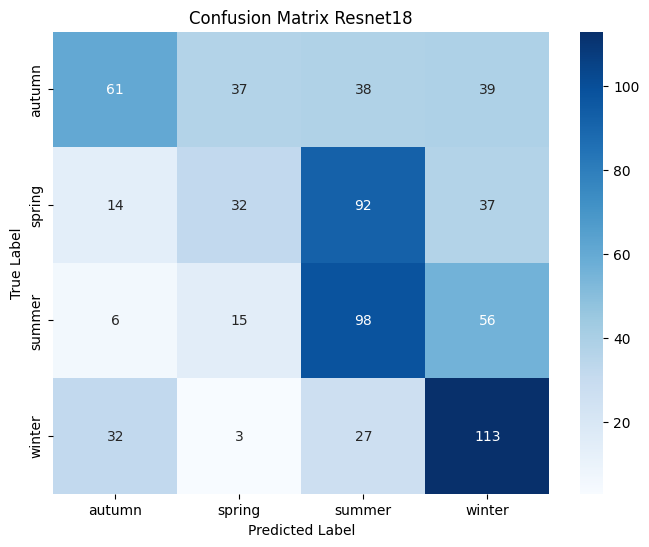

Normalized Confusion Matrix


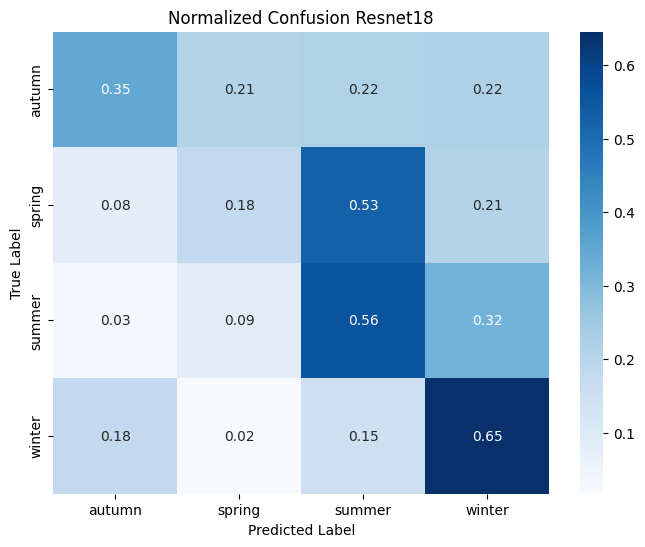

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation Accuracy: 43.43%
Final Precision: 0.44
Final Recall: 0.43
Final F1 Score: 0.42


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torchvision.models import ResNet18_Weights
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Paths to your datasets
train_path = "/content/drive/MyDrive/masked_images_face/train"
test_path = "/content/drive/MyDrive/masked_images_face/test"

# Data transformations
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Datasets
train_dataset = datasets.ImageFolder(train_path, transform=transform_train)
test_dataset = datasets.ImageFolder(test_path, transform=transform_test)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Load pretrained ResNet-18
model = models.resnet18(weights=ResNet18_Weights.DEFAULT)

# Replace the final fully connected layer
num_classes = len(train_dataset.classes)  # Number of classes in the dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Send model to device
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and Validation functions
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=30):
    best_f1 = 0.0
    history = {
        'train_loss': [],
        'train_accuracy': [],
        'val_loss': [],
        'val_accuracy': [],
        'val_precision': [],
        'val_recall': [],
        'val_f1': []
    }

    for epoch in range(num_epochs):
        # Training Phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_train_loss = running_loss / len(train_loader.dataset)
        epoch_train_acc = 100. * correct / total
        history['train_loss'].append(epoch_train_loss)
        history['train_accuracy'].append(epoch_train_acc)

        # Validation Phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        epoch_val_loss = val_running_loss / len(val_loader.dataset)
        epoch_val_acc = 100. * val_correct / val_total
        val_precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
        val_recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
        val_f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

        history['val_loss'].append(epoch_val_loss)
        history['val_accuracy'].append(epoch_val_acc)
        history['val_precision'].append(val_precision)
        history['val_recall'].append(val_recall)
        history['val_f1'].append(val_f1)

        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc:.2f}%")
        print(f"Val Loss: {epoch_val_loss:.4f} | Val Acc: {epoch_val_acc:.2f}% | Precision: {val_precision:.2f} | Recall: {val_recall:.2f} | F1 Score: {val_f1:.2f}")

        # Save the best model based on F1 Score
        if val_f1 > best_f1:
            best_f1 = val_f1
            torch.save(model.state_dict(), 'best_resnet18_model.pth')
            print(">> Best model saved.")

    print("Training complete.")
    return history

# Validation function for confusion matrix
def get_confusion_matrix(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    return cm

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without normalization")

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d",
                cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Train the model
history = train_model(model, criterion, optimizer, train_loader, test_loader, num_epochs=10)

# Load the best model
model.load_state_dict(torch.load('best_resnet18_model.pth'))

# Compute confusion matrix
cm = get_confusion_matrix(model, test_loader)

# Get class names
class_names = train_dataset.classes

# Plot non-normalized confusion matrix
plot_confusion_matrix(cm, classes=class_names, normalize=False, title='Confusion Matrix Resnet18')

# Optionally, plot normalized confusion matrix
plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Normalized Confusion Resnet18')

# Compute final metrics on the test set
def compute_final_metrics(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    final_precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    final_recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    final_f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    print(f"Validation Accuracy: {accuracy*100:.2f}%")
    print(f"Final Precision: {final_precision:.2f}")
    print(f"Final Recall: {final_recall:.2f}")
    print(f"Final F1 Score: {final_f1:.2f}")

compute_final_metrics(model, test_loader)


Resnet50

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 50.0MB/s]


Epoch [1/10]
Train Loss: 1.3533 | Train Acc: 32.69%
Val Loss: 1.4570 | Val Acc: 29.57% | Precision: 0.34 | Recall: 0.30 | F1 Score: 0.24
>> Best model saved.


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [2/10]
Train Loss: 1.3164 | Train Acc: 36.63%
Val Loss: 1.3928 | Val Acc: 27.43% | Precision: 0.51 | Recall: 0.27 | F1 Score: 0.15


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [3/10]
Train Loss: 1.2823 | Train Acc: 37.26%
Val Loss: 1.2816 | Val Acc: 39.71% | Precision: 0.45 | Recall: 0.40 | F1 Score: 0.35
>> Best model saved.


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [4/10]
Train Loss: 1.2775 | Train Acc: 39.40%
Val Loss: 1.3942 | Val Acc: 37.57% | Precision: 0.47 | Recall: 0.38 | F1 Score: 0.30


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [5/10]
Train Loss: 1.2477 | Train Acc: 41.94%
Val Loss: 1.2295 | Val Acc: 41.00% | Precision: 0.41 | Recall: 0.41 | F1 Score: 0.39
>> Best model saved.


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [6/10]
Train Loss: 1.2384 | Train Acc: 41.94%
Val Loss: 1.2488 | Val Acc: 42.14% | Precision: 0.46 | Recall: 0.42 | F1 Score: 0.39


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [7/10]
Train Loss: 1.2270 | Train Acc: 41.80%
Val Loss: 1.3940 | Val Acc: 37.86% | Precision: 0.46 | Recall: 0.38 | F1 Score: 0.30


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [8/10]
Train Loss: 1.2223 | Train Acc: 43.06%
Val Loss: 1.2692 | Val Acc: 43.00% | Precision: 0.48 | Recall: 0.43 | F1 Score: 0.40
>> Best model saved.


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [9/10]
Train Loss: 1.1913 | Train Acc: 45.23%
Val Loss: 1.3310 | Val Acc: 43.29% | Precision: 0.47 | Recall: 0.43 | F1 Score: 0.38


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [10/10]
Train Loss: 1.1974 | Train Acc: 44.66%
Val Loss: 1.2020 | Val Acc: 44.71% | Precision: 0.45 | Recall: 0.45 | F1 Score: 0.44
>> Best model saved.
Training complete.


<ipython-input-5-65bf424b7332>:188: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_resnet50_model.pth'))
/usr/local/lib/python3.11/dist

Confusion Matrix, without normalization Resnet50


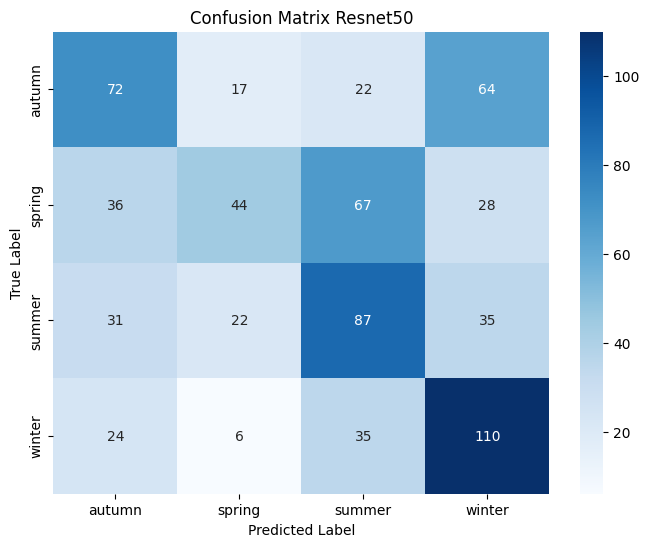

Normalized Confusion Matrix Resnet50


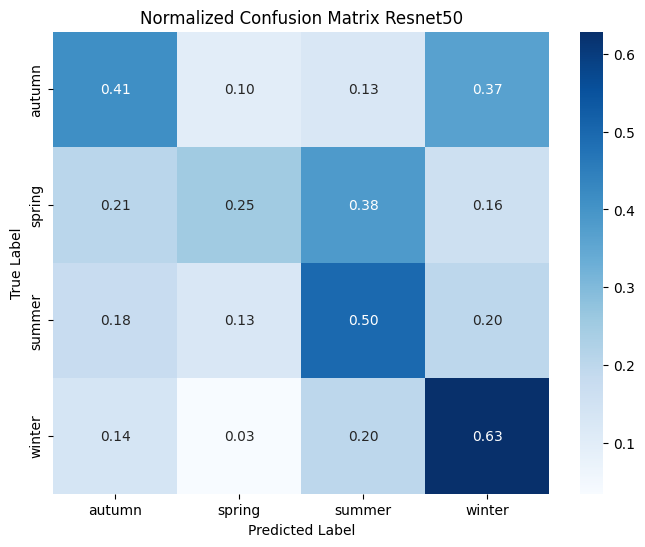

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation Accuracy: 44.71%
Final Precision: 0.45
Final Recall: 0.45
Final F1 Score: 0.44


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torchvision.models import ResNet50_Weights
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Paths to your datasets
train_path = "/content/drive/MyDrive/masked_images_face/train"
test_path = "/content/drive/MyDrive/masked_images_face/test"

# Data transformations
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Datasets
train_dataset = datasets.ImageFolder(train_path, transform=transform_train)
test_dataset = datasets.ImageFolder(test_path, transform=transform_test)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Load pretrained ResNet-18
model = models.resnet50(weights=ResNet50_Weights.DEFAULT)

# Replace the final fully connected layer
num_classes = len(train_dataset.classes)  # Number of classes in the dataset
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Send model to device
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and Validation functions
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=30):
    best_f1 = 0.0
    history = {
        'train_loss': [],
        'train_accuracy': [],
        'val_loss': [],
        'val_accuracy': [],
        'val_precision': [],
        'val_recall': [],
        'val_f1': []
    }

    for epoch in range(num_epochs):
        # Training Phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_train_loss = running_loss / len(train_loader.dataset)
        epoch_train_acc = 100. * correct / total
        history['train_loss'].append(epoch_train_loss)
        history['train_accuracy'].append(epoch_train_acc)

        # Validation Phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        epoch_val_loss = val_running_loss / len(val_loader.dataset)
        epoch_val_acc = 100. * val_correct / val_total
        val_precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
        val_recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
        val_f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

        history['val_loss'].append(epoch_val_loss)
        history['val_accuracy'].append(epoch_val_acc)
        history['val_precision'].append(val_precision)
        history['val_recall'].append(val_recall)
        history['val_f1'].append(val_f1)

        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc:.2f}%")
        print(f"Val Loss: {epoch_val_loss:.4f} | Val Acc: {epoch_val_acc:.2f}% | Precision: {val_precision:.2f} | Recall: {val_recall:.2f} | F1 Score: {val_f1:.2f}")

        # Save the best model based on F1 Score
        if val_f1 > best_f1:
            best_f1 = val_f1
            torch.save(model.state_dict(), 'best_resnet50_model.pth')
            print(">> Best model saved.")

    print("Training complete.")
    return history

# Validation function for confusion matrix
def get_confusion_matrix(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    return cm

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix Resnet50', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix Resnet50")
    else:
        print("Confusion Matrix, without normalization Resnet50")

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d",
                cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Train the model
history = train_model(model, criterion, optimizer, train_loader, test_loader, num_epochs=10)

# Load the best model
model.load_state_dict(torch.load('best_resnet50_model.pth'))

# Compute confusion matrix
cm = get_confusion_matrix(model, test_loader)

# Get class names
class_names = train_dataset.classes

# Plot non-normalized confusion matrix
plot_confusion_matrix(cm, classes=class_names, normalize=False, title='Confusion Matrix Resnet50')

# Optionally, plot normalized confusion matrix
plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Normalized Confusion Matrix Resnet50')

# Compute final metrics on the test set
def compute_final_metrics(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    final_precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    final_recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    final_f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    print(f"Validation Accuracy: {accuracy*100:.2f}%")
    print(f"Final Precision: {final_precision:.2f}")
    print(f"Final Recall: {final_recall:.2f}")
    print(f"Final F1 Score: {final_f1:.2f}")

compute_final_metrics(model, test_loader)


MobilenetV2

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [1/10]
Train Loss: 1.3135 | Train Acc: 36.89%
Val Loss: 1.2376 | Val Acc: 43.14% | Precision: 0.44 | Recall: 0.43 | F1 Score: 0.43
>> Best model saved.


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [2/10]
Train Loss: 1.2437 | Train Acc: 42.60%
Val Loss: 1.2212 | Val Acc: 44.57% | Precision: 0.46 | Recall: 0.45 | F1 Score: 0.43
>> Best model saved.


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [3/10]
Train Loss: 1.2105 | Train Acc: 44.86%
Val Loss: 1.2009 | Val Acc: 46.29% | Precision: 0.48 | Recall: 0.46 | F1 Score: 0.44
>> Best model saved.


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [4/10]
Train Loss: 1.1830 | Train Acc: 46.43%
Val Loss: 1.1518 | Val Acc: 46.29% | Precision: 0.49 | Recall: 0.46 | F1 Score: 0.46
>> Best model saved.


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [5/10]
Train Loss: 1.1466 | Train Acc: 48.37%
Val Loss: 1.1966 | Val Acc: 44.00% | Precision: 0.45 | Recall: 0.44 | F1 Score: 0.41


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [6/10]
Train Loss: 1.1243 | Train Acc: 50.29%
Val Loss: 1.2829 | Val Acc: 44.57% | Precision: 0.49 | Recall: 0.45 | F1 Score: 0.41


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [7/10]
Train Loss: 1.1100 | Train Acc: 49.63%
Val Loss: 1.1825 | Val Acc: 46.00% | Precision: 0.47 | Recall: 0.46 | F1 Score: 0.46


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [8/10]
Train Loss: 1.0972 | Train Acc: 52.29%
Val Loss: 1.1904 | Val Acc: 45.57% | Precision: 0.48 | Recall: 0.46 | F1 Score: 0.45


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [9/10]
Train Loss: 1.0677 | Train Acc: 53.54%
Val Loss: 1.2011 | Val Acc: 48.14% | Precision: 0.49 | Recall: 0.48 | F1 Score: 0.47
>> Best model saved.


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch [10/10]
Train Loss: 1.0618 | Train Acc: 53.86%
Val Loss: 1.2664 | Val Acc: 43.71% | Precision: 0.46 | Recall: 0.44 | F1 Score: 0.41
Training complete.


<ipython-input-15-576e90b28334>:188: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_mobilenetv2_model.pth'))
/usr/local/lib/python3.11/

Confusion Matrix, without normalization


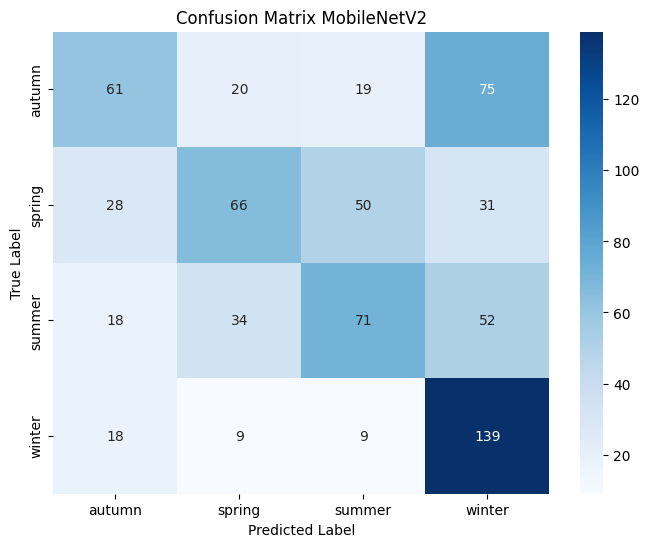

Normalized Confusion Matrix


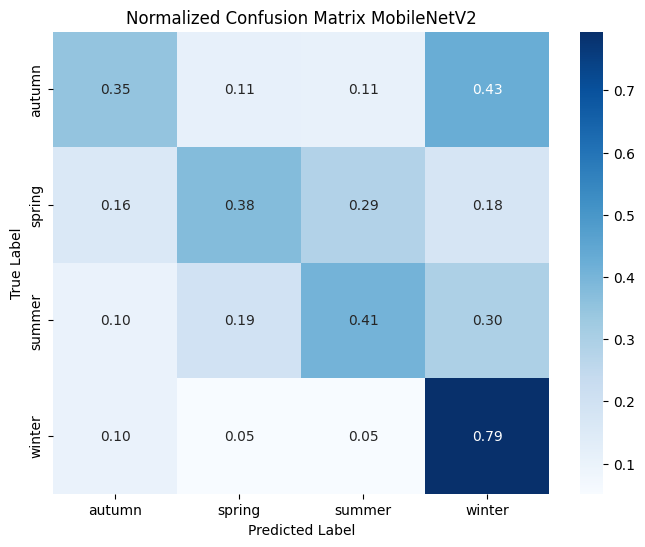

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation Accuracy: 48.14%
Final Precision: 0.49
Final Recall: 0.48
Final F1 Score: 0.47


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torchvision.models import MobileNet_V2_Weights
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Paths to your datasets
train_path = "/content/drive/MyDrive/masked_images_face/train"
test_path = "/content/drive/MyDrive/masked_images_face/test"

# Data transformations
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Datasets
train_dataset = datasets.ImageFolder(train_path, transform=transform_train)
test_dataset = datasets.ImageFolder(test_path, transform=transform_test)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Load pretrained MobileNetV2
model = models.mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT)

# Replace the final classifier layer
num_classes = len(train_dataset.classes)  # Number of classes in the dataset
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

# Send model to device
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training and Validation functions
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    best_f1 = 0.0
    history = {
        'train_loss': [],
        'train_accuracy': [],
        'val_loss': [],
        'val_accuracy': [],
        'val_precision': [],
        'val_recall': [],
        'val_f1': []
    }

    for epoch in range(num_epochs):
        # Training Phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        epoch_train_loss = running_loss / len(train_loader.dataset)
        epoch_train_acc = 100. * correct / total
        history['train_loss'].append(epoch_train_loss)
        history['train_accuracy'].append(epoch_train_acc)

        # Validation Phase
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        epoch_val_loss = val_running_loss / len(val_loader.dataset)
        epoch_val_acc = 100. * val_correct / val_total
        val_precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
        val_recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
        val_f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

        history['val_loss'].append(epoch_val_loss)
        history['val_accuracy'].append(epoch_val_acc)
        history['val_precision'].append(val_precision)
        history['val_recall'].append(val_recall)
        history['val_f1'].append(val_f1)

        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc:.2f}%")
        print(f"Val Loss: {epoch_val_loss:.4f} | Val Acc: {epoch_val_acc:.2f}% | Precision: {val_precision:.2f} | Recall: {val_recall:.2f} | F1 Score: {val_f1:.2f}")

        # Save the best model based on F1 Score
        if val_f1 > best_f1:
            best_f1 = val_f1
            torch.save(model.state_dict(), 'best_mobilenetv2_model.pth')
            print(">> Best model saved.")

    print("Training complete.")
    return history

# Validation function for confusion matrix
def get_confusion_matrix(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    return cm

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without normalization")

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d",
                cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Train the model
history = train_model(model, criterion, optimizer, train_loader, test_loader, num_epochs=10)

# Load the best model
model.load_state_dict(torch.load('best_mobilenetv2_model.pth'))

# Compute confusion matrix
cm = get_confusion_matrix(model, test_loader)

# Get class names
class_names = train_dataset.classes

# Plot non-normalized confusion matrix
plot_confusion_matrix(cm, classes=class_names, normalize=False, title='Confusion Matrix MobileNetV2')

# Optionally, plot normalized confusion matrix
plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Normalized Confusion Matrix MobileNetV2')

# Compute final metrics on the test set
def compute_final_metrics(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    final_precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    final_recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    final_f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    print(f"Validation Accuracy: {accuracy*100:.2f}%")
    print(f"Final Precision: {final_precision:.2f}")
    print(f"Final Recall: {final_recall:.2f}")
    print(f"Final F1 Score: {final_f1:.2f}")

compute_final_metrics(model, test_loader)


<ipython-input-13-ab33ebe6ad2b>:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_mobilenetv2_model.pth'))


Confusion Matrix, without normalization


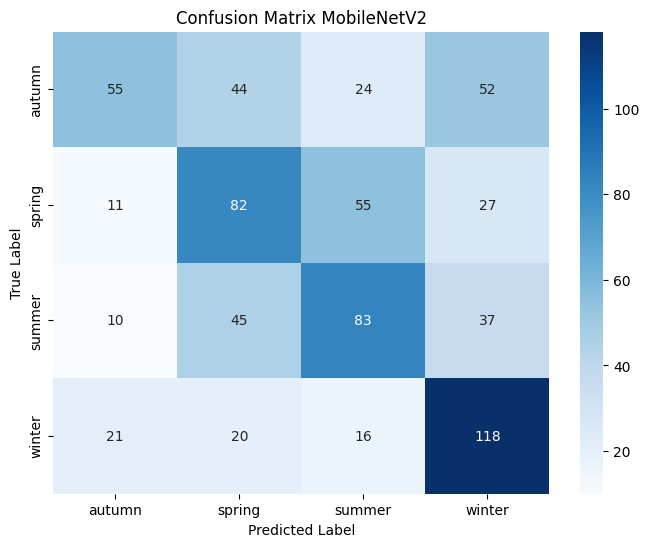

Normalized Confusion Matrix


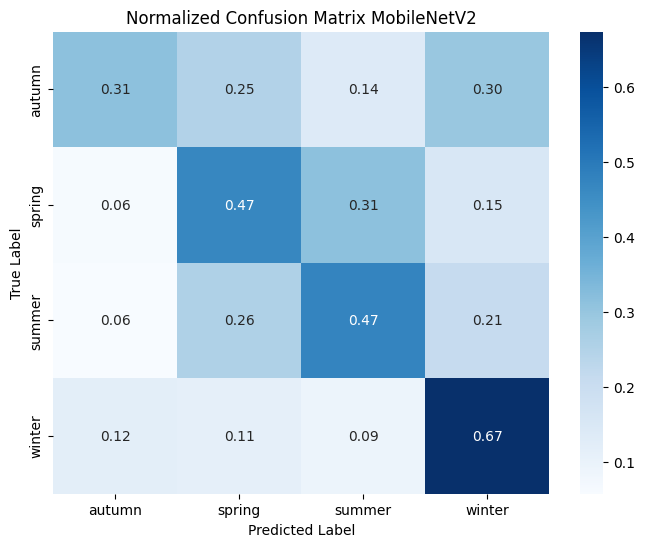

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Validation Accuracy: 48.29%
Final Precision: 0.49
Final Recall: 0.48
Final F1 Score: 0.47


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torchvision.models import MobileNet_V2_Weights
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Paths to your datasets
train_path = "/content/drive/MyDrive/masked_images_face/train"
test_path = "/content/drive/MyDrive/masked_images_face/test"

# Data transformations
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Datasets
train_dataset = datasets.ImageFolder(train_path, transform=transform_train)
test_dataset = datasets.ImageFolder(test_path, transform=transform_test)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Load pretrained MobileNetV2
model = models.mobilenet_v2(weights=MobileNet_V2_Weights.DEFAULT)

# Replace the final classifier layer
num_classes = len(train_dataset.classes)  # Number of classes in the dataset
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

# Send model to device
model = model.to(device)

# Load the best model
model.load_state_dict(torch.load('best_mobilenetv2_model.pth'))

# Validation function for confusion matrix
def get_confusion_matrix(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    return cm

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, without normalization")

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d",
                cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Compute confusion matrix
cm = get_confusion_matrix(model, test_loader)

# Get class names
class_names = train_dataset.classes

# Plot non-normalized confusion matrix
plot_confusion_matrix(cm, classes=class_names, normalize=False, title='Confusion Matrix MobileNetV2')

# Optionally, plot normalized confusion matrix
plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Normalized Confusion Matrix MobileNetV2')

# Compute final metrics on the test set
def compute_final_metrics(model, data_loader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    final_precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
    final_recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
    final_f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)

    print(f"Validation Accuracy: {accuracy*100:.2f}%")
    print(f"Final Precision: {final_precision:.2f}")
    print(f"Final Recall: {final_recall:.2f}")
    print(f"Final F1 Score: {final_f1:.2f}")

compute_final_metrics(model, test_loader)
